### EDA

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#importing dataset
df = pd.read_csv('courses_udemy.csv')

In [11]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


#### Subjects

In [12]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [13]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [14]:
len(df['subject'].unique())

4

In [15]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

In [30]:
list(labels)

['Business Finance',
 'Graphic Design',
 'Musical Instruments',
 'Web Development']

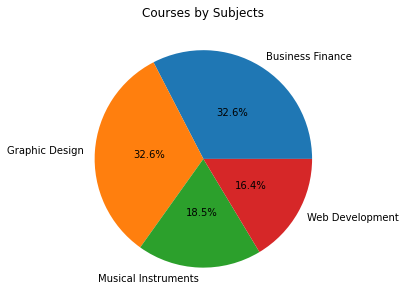

In [37]:
pie, ax = plt.subplots(figsize=(5,5))
labels = df['subject'].unique()
plt.pie(x=df['subject'].value_counts(), autopct="%.1f%%", pctdistance=0.5, labels=labels)
plt.title("Courses by Subjects")
plt.show()

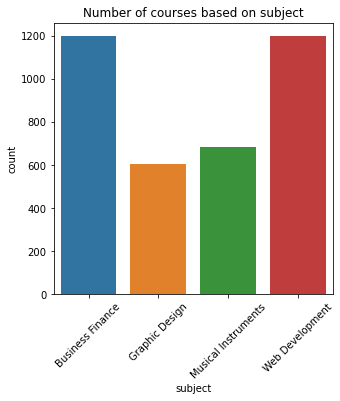

In [26]:
plt.figure(figsize=(5,5,))
sns.countplot(df['subject'])
plt.xticks(rotation=45)
plt.title('Number of courses based on subject')
plt.show()

#### Subscribers

In [38]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [39]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

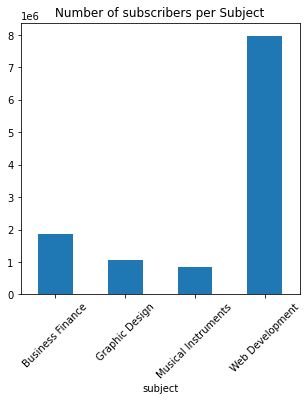

In [49]:
plt.figure(figsize=(5,5))
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Number of subscribers per Subject')
plt.show()

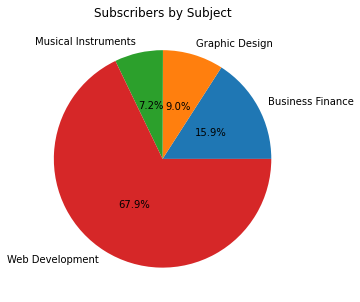

In [85]:
pie, ax = plt.subplots(figsize=(5,5))
labels = df['subject'].unique()
plt.pie(x=df.groupby('subject')['num_subscribers'].sum(), autopct="%.1f%%", pctdistance=0.5, labels=labels)
plt.title("Subscribers by Subject")
plt.show()

#### So far, we understand that most of the courses are about graphic design and business finance and web development has more subscribers than other subjects.

In [52]:
df['num_subscribers'].sum()

11761186

In [53]:
df['num_subscribers'].mean()

3193.3711648112953

In [68]:
df['num_subscribers'].value_counts().sort_index()

0         70
1         49
2         27
3         26
4         26
          ..
114512     1
120291     1
121584     1
161029     1
268923     1
Name: num_subscribers, Length: 2198, dtype: int64

In [69]:
df['num_subscribers'].min()

0

In [55]:
df['num_subscribers'].max()

268923

In [60]:
df['num_subscribers'].idxmax()

2832

In [57]:
df.iloc[2832]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

+ Based on this dataset, udemy has over 11 million subscribers
+ "Learn HTML5 Programming From Scratch" course have the highest amount of subscribers: 268923
+ There are 70 courses with 0 subscribers
+ Average number of subscribers for courses: 3194

#### Levels

In [ ]:
df.drop(index=2066,inplace=True)

In [126]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [125]:
df['level'].value_counts()

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

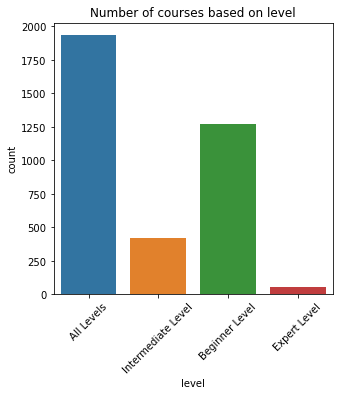

In [124]:
plt.figure(figsize=(5,5,))
sns.countplot(df['level'])
plt.xticks(rotation=45)
plt.title('Number of courses based on level')
plt.show()

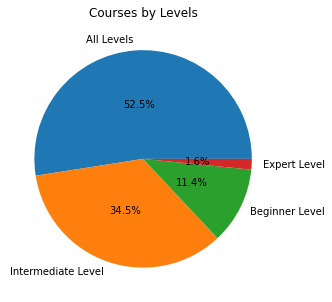

In [128]:
pie, ax = plt.subplots(figsize=(5,5))
labels = df['level'].unique()
plt.pie(x=df['level'].value_counts(), autopct="%.1f%%", pctdistance=0.5, labels=labels)
plt.title("Courses by Levels")
plt.show()

In [131]:
#Number of subscribers per levels
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

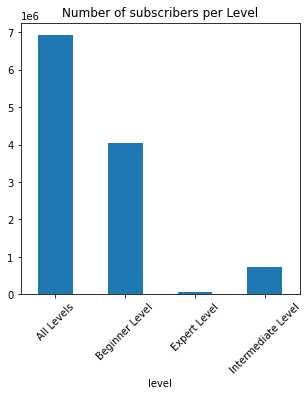

In [130]:
plt.figure(figsize=(5,5))
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Number of subscribers per Level')
plt.show()

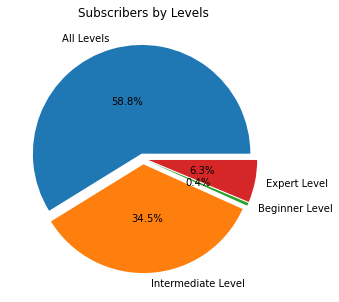

In [140]:
pie, ax = plt.subplots(figsize=(5,5))
labels = df['level'].unique()
plt.pie(x=df.groupby('level')['num_subscribers'].sum(), autopct="%.1f%%", pctdistance=0.5, labels=labels,explode=[0.05]*4)
plt.title("Subscribers by Levels")
plt.show()

In [141]:
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

<AxesSubplot:xlabel='subject,level'>

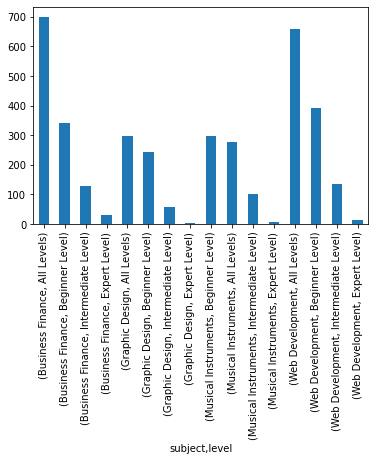

In [142]:
df.groupby('subject')['level'].value_counts().plot(kind='bar')

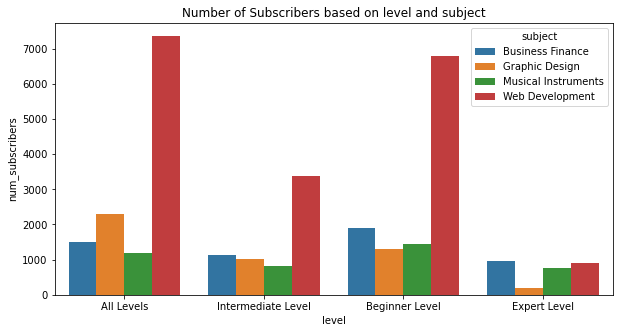

In [163]:
plt.figure(figsize=(10,5,))
sns.barplot(x='level',y='num_subscribers',data=df,hue='subject', ci=None)
plt.title('Number of Subscribers based on level and subject')
plt.show()

#### Reviews

In [155]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [164]:
def plot_feature(feature):
    plt.figure(figsize=(10,5,))
    sns.barplot(x='level',y=feature,data=df,hue='subject', ci=None)
    plt.title(f"Plot of {feature} per level per subject")
    plt.show()
    
    
    pie, ax = plt.subplots(figsize=(5,5))
    labels = df['level'].unique()
    plt.pie(x=df.groupby('level')[feature].sum(), autopct="%.1f%%", pctdistance=0.5, labels=labels,explode=[0.05]*4)
    plt.title(f"Plot of {feature} by level")
    plt.show()

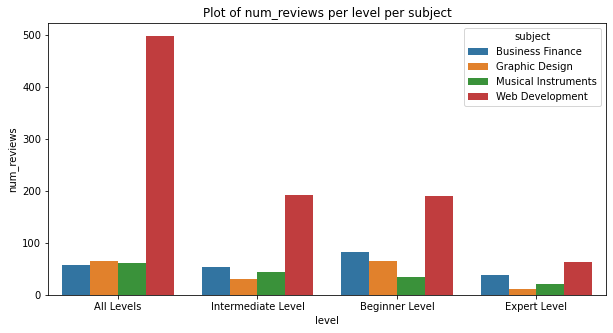

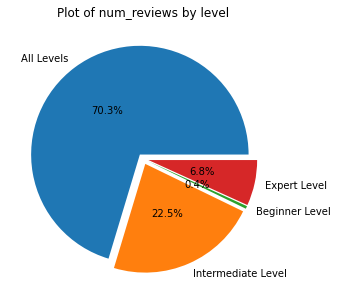

In [165]:
plot_feature('num_reviews')

#### Lectures

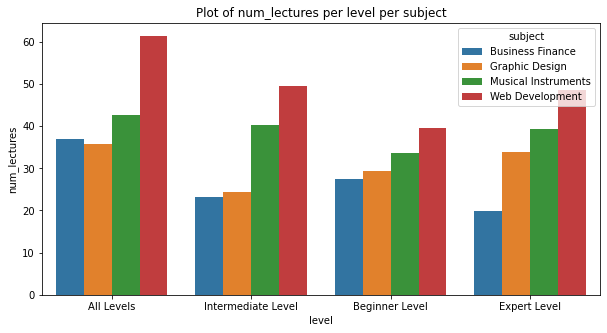

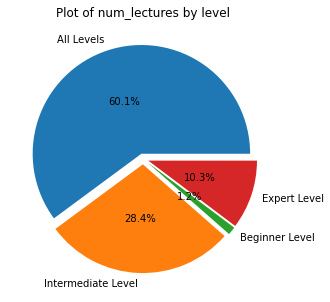

In [168]:
plot_feature('num_lectures')

#### Price

In [170]:
df['price'].dtype

dtype('O')

In [190]:
df.price.value_counts()

20.0     830
50.0     468
0.0      310
200.0    295
40.0     217
30.0     170
25.0     154
95.0     152
100.0    133
195.0    127
35.0     116
150.0     88
45.0      83
75.0      81
60.0      75
120.0     37
55.0      35
85.0      31
65.0      30
125.0     30
80.0      29
145.0     27
70.0      26
90.0      19
180.0     17
115.0     16
175.0     13
105.0     11
190.0     10
140.0     10
110.0      8
135.0      8
185.0      6
165.0      6
170.0      5
160.0      4
130.0      3
155.0      2
Name: price, dtype: int64

In [171]:
df.price.unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [173]:
df['price'] = df['price'].str.replace('Free','0')

In [174]:
df.price.unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [176]:
df['price'] = df['price'].astype(float)

In [178]:
df.price.mean()

66.01032047800109

In [179]:
df.price.max()

200.0

In [183]:
df['profit'] = df['price'] * df['num_subscribers']

In [185]:
df.profit.idxmax()

3235

In [186]:
df.iloc[3235]

course_id                                                  164554
course_title                  AngularJS JumpStart with Dan Wahlin
url                    https://www.udemy.com/angularjs-jumpstart/
is_paid                                                      True
price                                                        75.0
num_subscribers                                             17802
num_reviews                                                  2144
num_lectures                                                  113
level                                                  All Levels
content_duration                                         10 hours
published_timestamp                          2014-03-24T17:31:15Z
subject                                           Web Development
profit                                                  1335150.0
Name: 3236, dtype: object

+ Most profitable course is "AngularJS JumpStart with Dan Wahlin" and made $13 million

In [191]:
df['is_paid'].unique()

array(['True', 'False', 'FALSE', 'TRUE'], dtype=object)

In [192]:
paid_d = {'True':True, 'Fase':False, 'FALSE':False, 'TRUE':True}

In [193]:
df["is_paid"] = df['is_paid'].map(paid_d)

In [194]:
df['is_paid'].value_counts()

True     3372
False      46
Name: is_paid, dtype: int64

In [202]:
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Musical Instruments      46
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

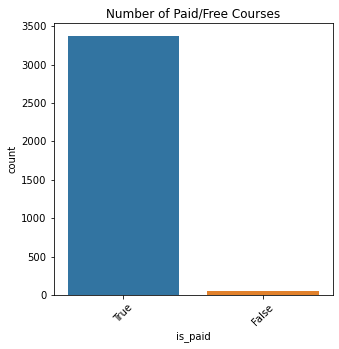

In [197]:
plt.figure(figsize=(5,5,))
sns.countplot(df['is_paid'])
plt.xticks(rotation=45)
plt.title('Number of Paid/Free Courses')
plt.show()

<AxesSubplot:xlabel='is_paid,subject'>

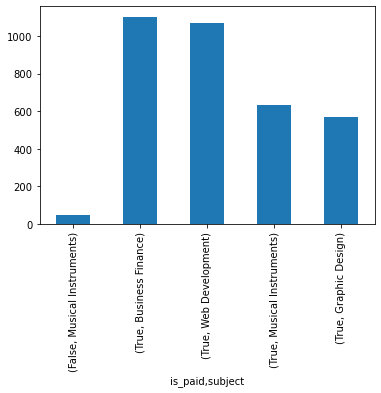

In [201]:
df.groupby('is_paid')['subject'].value_counts().plot(kind='bar')

#### Correlation

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

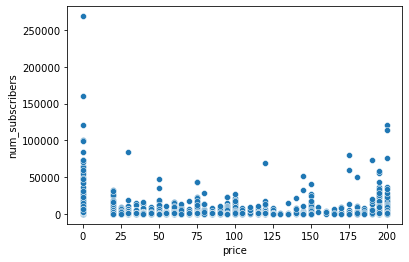

In [203]:
sns.scatterplot(data=df, x='price', y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

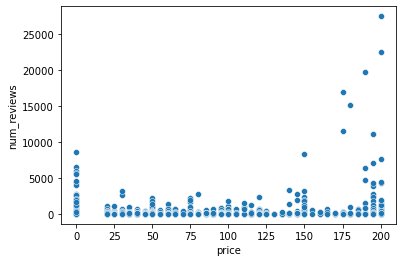

In [204]:
sns.scatterplot(data=df, x='price', y='num_reviews')

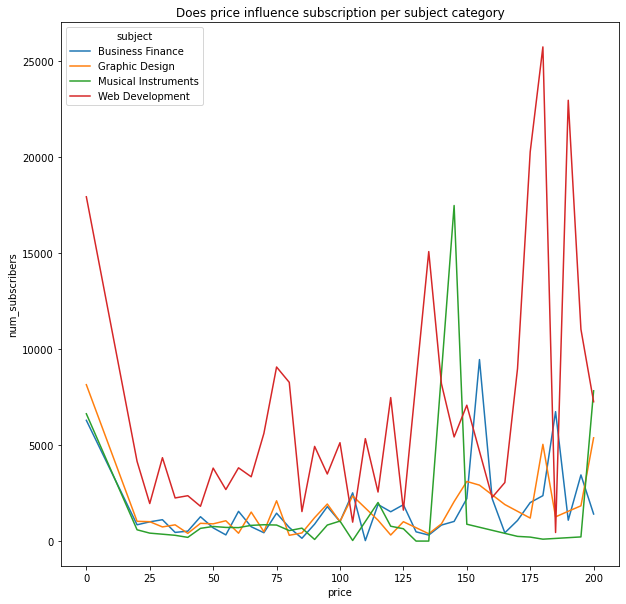

In [211]:
plt.figure(figsize=(10,10))
plt.title('Does price influence subscription per subject category')
sns.lineplot(data=df, x='price', y='num_subscribers', hue='subject', ci=None)
plt.show()

#### Time

In [212]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200.0


In [213]:
df['published_timestamp'].dtype

dtype('O')

In [218]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [219]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3682, dtype: object

In [220]:
from datetime import datetime

In [224]:
def convert_date(x):
    
    date = datetime.strptime(x, "%Y-%m-%d")
    result = date.strftime("%Y-%m-%d")
    return result

In [230]:
df['published_date'] = df['published_date'].apply(lambda x:convert_date(x))

In [231]:
df['published_date'] = pd.to_datetime(df['published_date'], format= '%Y-%m-%d')

In [232]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                        object
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
profit                        float64
published_date         datetime64[ns]
dtype: object

In [233]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [236]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2894, dtype: int64

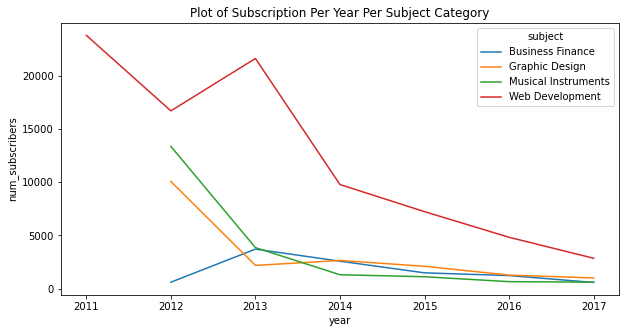

In [241]:
plt.figure(figsize=(10,5))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject', ci=None)
plt.show()